# Cleaning Datas for a linear regression model 

We now prepare the datas specifically for our linear regression model. Our goal will be to predict the feature 'temp' on a given day using datas from the previous 3 days. We use the data set that we initially cleaned in cleaning_datas.ipynb 

We import the libraries.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

We put the csv file back into a dataframe. We put 'df_iso' into datetime format and setting as index.

In [2]:
df_lr = pd.read_csv('weather_data_initial_clean.csv')
df_lr['dt_iso'] = pd.to_datetime(df_lr['dt_iso'], format='%Y-%m-%d %H:%M:%S.%f')
df_lr = df_lr.set_index('dt_iso')
print('Data Shape = {}'.format(df_lr.shape))
print(df_lr.columns)

Data Shape = (373025, 13)
Index(['temp', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'wind_deg',
       'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'weather_id',
       'weather_main'],
      dtype='object')


In [3]:
df_lr.head()

,temp,feels_like,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main
dt_iso,,,,,,,,,,,,,
1979-01-01 00:00:00,275.12,269.76,1025,80,4.6,140,NaN,NaN,NaN,NaN,90,300,Drizzle
1979-01-01 01:00:00,275.08,271.53,1023,80,2.0,90,NaN,NaN,NaN,NaN,90,600,Snow
1979-01-01 02:00:00,275.06,271.16,1022,80,2.5,120,NaN,NaN,NaN,NaN,90,804,Clouds
1979-01-01 03:00:00,275.97,267.30,1021,86,9.7,160,NaN,NaN,NaN,NaN,90,804,Clouds
1979-01-01 04:00:00,276.32,267.88,1019,93,9.7,160,0.5,NaN,NaN,NaN,90,500,Rain


In [4]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373025 entries, 1979-01-01 00:00:00 to 2020-07-31 23:00:00
Data columns (total 13 columns):
temp            373025 non-null float64
feels_like      373025 non-null float64
pressure        373025 non-null int64
humidity        373025 non-null int64
wind_speed      373025 non-null float64
wind_deg        373025 non-null int64
rain_1h         36787 non-null float64
rain_3h         1622 non-null float64
snow_1h         11761 non-null float64
snow_3h         938 non-null float64
clouds_all      373025 non-null int64
weather_id      373025 non-null int64
weather_main    373025 non-null object
dtypes: float64(7), int64(5), object(1)
memory usage: 39.8+ MB


We first get rid of the categorical datas. 

In [5]:
df_lr = df_lr.drop(columns = ['weather_id', 'weather_main'])
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373025 entries, 1979-01-01 00:00:00 to 2020-07-31 23:00:00
Data columns (total 11 columns):
temp          373025 non-null float64
feels_like    373025 non-null float64
pressure      373025 non-null int64
humidity      373025 non-null int64
wind_speed    373025 non-null float64
wind_deg      373025 non-null int64
rain_1h       36787 non-null float64
rain_3h       1622 non-null float64
snow_1h       11761 non-null float64
snow_3h       938 non-null float64
clouds_all    373025 non-null int64
dtypes: float64(7), int64(4)
memory usage: 34.2 MB


We create for each day, features encoding the datas 3 days prior.   

In [6]:
#Adds a column of a given feature N days prior. 
def prior_n_day_feature(df, feature, N):
    rows = df.shape[0]
    prior_n_datas = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df[col_name] = prior_n_datas

In [7]:
#Loop over all features and N = 1,2,3
for feature in df_lr.columns:
    for N in range(1, 4):
            prior_n_day_feature(df_lr, feature, N)

In [8]:
pd.set_option('display.max_columns', 999)

In [9]:
df_lr.head()

,temp,feels_like,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,temp_1,temp_2,temp_3,feels_like_1,feels_like_2,feels_like_3,pressure_1,pressure_2,pressure_3,humidity_1,humidity_2,humidity_3,wind_speed_1,wind_speed_2,wind_speed_3,wind_deg_1,wind_deg_2,wind_deg_3,rain_1h_1,rain_1h_2,rain_1h_3,rain_3h_1,rain_3h_2,rain_3h_3,snow_1h_1,snow_1h_2,snow_1h_3,snow_3h_1,snow_3h_2,snow_3h_3,clouds_all_1,clouds_all_2,clouds_all_3
dt_iso,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1979-01-01 00:00:00,275.12,269.76,1025,80,4.6,140,NaN,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-01-01 01:00:00,275.08,271.53,1023,80,2.0,90,NaN,NaN,NaN,NaN,90,275.12,NaN,NaN,269.76,NaN,NaN,1025.0,NaN,NaN,80.0,NaN,NaN,4.6,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN
1979-01-01 02:00:00,275.06,271.16,1022,80,2.5,120,NaN,NaN,NaN,NaN,90,275.08,275.12,NaN,271.53,269.76,NaN,1023.0,1025.0,NaN,80.0,80.0,NaN,2.0,4.6,NaN,90.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,90.0,NaN
1979-01-01 03:00:00,275.97,267.30,1021,86,9.7,160,NaN,NaN,NaN,NaN,90,275.06,275.08,275.12,271.16,271.53,269.76,1022.0,1023.0,1025.0,80.0,80.0,80.0,2.5,2.0,4.6,120.0,90.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,90.0,90.0
1979-01-01 04:00:00,276.32,267.88,1019,93,9.7,160,0.5,NaN,NaN,NaN,90,275.97,275.06,275.08,267.30,271.16,271.53,1021.0,1022.0,1023.0,86.0,80.0,80.0,9.7,2.5,2.0,160.0,120.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,90.0,90.0


In [10]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373025 entries, 1979-01-01 00:00:00 to 2020-07-31 23:00:00
Data columns (total 44 columns):
temp            373025 non-null float64
feels_like      373025 non-null float64
pressure        373025 non-null int64
humidity        373025 non-null int64
wind_speed      373025 non-null float64
wind_deg        373025 non-null int64
rain_1h         36787 non-null float64
rain_3h         1622 non-null float64
snow_1h         11761 non-null float64
snow_3h         938 non-null float64
clouds_all      373025 non-null int64
temp_1          373024 non-null float64
temp_2          373023 non-null float64
temp_3          373022 non-null float64
feels_like_1    373024 non-null float64
feels_like_2    373023 non-null float64
feels_like_3    373022 non-null float64
pressure_1      373024 non-null float64
pressure_2      373023 non-null float64
pressure_3      373022 non-null float64
humidity_1      373024 non-null float64
humidity_2      373023 non-nul

As we only want to predict 'temp' and we will only use datas from previous days, we drop the other features giving datas for the same day.  

In [11]:
df_lr = df_lr.drop(columns = ['feels_like', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h',
                              'snow_1h','snow_3h','clouds_all'])

In [12]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373025 entries, 1979-01-01 00:00:00 to 2020-07-31 23:00:00
Data columns (total 34 columns):
temp            373025 non-null float64
temp_1          373024 non-null float64
temp_2          373023 non-null float64
temp_3          373022 non-null float64
feels_like_1    373024 non-null float64
feels_like_2    373023 non-null float64
feels_like_3    373022 non-null float64
pressure_1      373024 non-null float64
pressure_2      373023 non-null float64
pressure_3      373022 non-null float64
humidity_1      373024 non-null float64
humidity_2      373023 non-null float64
humidity_3      373022 non-null float64
wind_speed_1    373024 non-null float64
wind_speed_2    373023 non-null float64
wind_speed_3    373022 non-null float64
wind_deg_1      373024 non-null float64
wind_deg_2      373023 non-null float64
wind_deg_3      373022 non-null float64
rain_1h_1       36787 non-null float64
rain_1h_2       36786 non-null float64
rain_1h_3       3

We want to deal with the missing datas. First, the new features all have missing values in the first 3 days, because we did not have the datas prior to that. So we remove the first three rows. 

In [13]:
df_lr = df_lr.iloc[3:]

In [14]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373022 entries, 1979-01-01 03:00:00 to 2020-07-31 23:00:00
Data columns (total 34 columns):
temp            373022 non-null float64
temp_1          373022 non-null float64
temp_2          373022 non-null float64
temp_3          373022 non-null float64
feels_like_1    373022 non-null float64
feels_like_2    373022 non-null float64
feels_like_3    373022 non-null float64
pressure_1      373022 non-null float64
pressure_2      373022 non-null float64
pressure_3      373022 non-null float64
humidity_1      373022 non-null float64
humidity_2      373022 non-null float64
humidity_3      373022 non-null float64
wind_speed_1    373022 non-null float64
wind_speed_2    373022 non-null float64
wind_speed_3    373022 non-null float64
wind_deg_1      373022 non-null float64
wind_deg_2      373022 non-null float64
wind_deg_3      373022 non-null float64
rain_1h_1       36787 non-null float64
rain_1h_2       36786 non-null float64
rain_1h_3       3

The rain and snow features contain a lot of missing values, which is normal since there are many days without precipitation. We replace those missing values with 0. 

In [15]:
# iterate over the precipitation columns
for col in ['rain_1h_1', 'rain_1h_2', 'rain_1h_3', 'rain_3h_1', 'rain_3h_2', 'rain_3h_3', 'snow_1h_1', 'snow_1h_2', 
           'snow_1h_3', 'snow_3h_1', 'snow_3h_2', 'snow_3h_3']:
    null_vals = pd.isnull(df_lr[col])
    df_lr[col][null_vals] = 0

In [16]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373022 entries, 1979-01-01 03:00:00 to 2020-07-31 23:00:00
Data columns (total 34 columns):
temp            373022 non-null float64
temp_1          373022 non-null float64
temp_2          373022 non-null float64
temp_3          373022 non-null float64
feels_like_1    373022 non-null float64
feels_like_2    373022 non-null float64
feels_like_3    373022 non-null float64
pressure_1      373022 non-null float64
pressure_2      373022 non-null float64
pressure_3      373022 non-null float64
humidity_1      373022 non-null float64
humidity_2      373022 non-null float64
humidity_3      373022 non-null float64
wind_speed_1    373022 non-null float64
wind_speed_2    373022 non-null float64
wind_speed_3    373022 non-null float64
wind_deg_1      373022 non-null float64
wind_deg_2      373022 non-null float64
wind_deg_3      373022 non-null float64
rain_1h_1       373022 non-null float64
rain_1h_2       373022 non-null float64
rain_1h_3      

Finally, we remove the 'wind_deg' features, as they are in some sense categorical datas that could be hard to work with in a linear regression model. Also, they probably have little impact on predicting temperatures. 

In [17]:
df_lr = df_lr.drop(columns = ['wind_deg_1', 'wind_deg_2', 'wind_deg_3'])
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373022 entries, 1979-01-01 03:00:00 to 2020-07-31 23:00:00
Data columns (total 31 columns):
temp            373022 non-null float64
temp_1          373022 non-null float64
temp_2          373022 non-null float64
temp_3          373022 non-null float64
feels_like_1    373022 non-null float64
feels_like_2    373022 non-null float64
feels_like_3    373022 non-null float64
pressure_1      373022 non-null float64
pressure_2      373022 non-null float64
pressure_3      373022 non-null float64
humidity_1      373022 non-null float64
humidity_2      373022 non-null float64
humidity_3      373022 non-null float64
wind_speed_1    373022 non-null float64
wind_speed_2    373022 non-null float64
wind_speed_3    373022 non-null float64
rain_1h_1       373022 non-null float64
rain_1h_2       373022 non-null float64
rain_1h_3       373022 non-null float64
rain_3h_1       373022 non-null float64
rain_3h_2       373022 non-null float64
rain_3h_3      

### Analysing the datas

We are now ready to analyse the datas in more depth. 

In [18]:
df_lr_desc = df_lr.describe().T
df_lr_desc.head(35)

,count,mean,std,min,25%,50%,75%,max
temp,373022.0,280.307642,12.061670,238.85,272.00,280.88,290.26,308.52
temp_1,373022.0,280.307581,12.061639,238.85,272.00,280.88,290.26,308.52
temp_2,373022.0,280.307519,12.061607,238.85,272.00,280.88,290.26,308.52
temp_3,373022.0,280.307454,12.061568,238.85,272.00,280.88,290.26,308.52
feels_like_1,373022.0,276.520151,14.116409,229.99,266.34,276.52,288.40,311.66
feels_like_2,373022.0,276.520076,14.116361,229.99,266.34,276.52,288.40,311.66
feels_like_3,373022.0,276.519995,14.116314,229.99,266.34,276.52,288.40,311.66
pressure_1,373022.0,1014.812252,9.078461,954.00,1009.00,1015.00,1021.00,1051.00
pressure_2,373022.0,1014.812341,9.078380,954.00,1009.00,1015.00,1021.00,1051.00
pressure_3,373022.0,1014.812384,9.078390,954.00,1009.00,1015.00,1021.00,1051.00


We see that the precipitations datas are mostly made of zeros, creating some outliers. We leave them for now, as this can easily be explained. 

We can now plot the different distributions for each feature. 

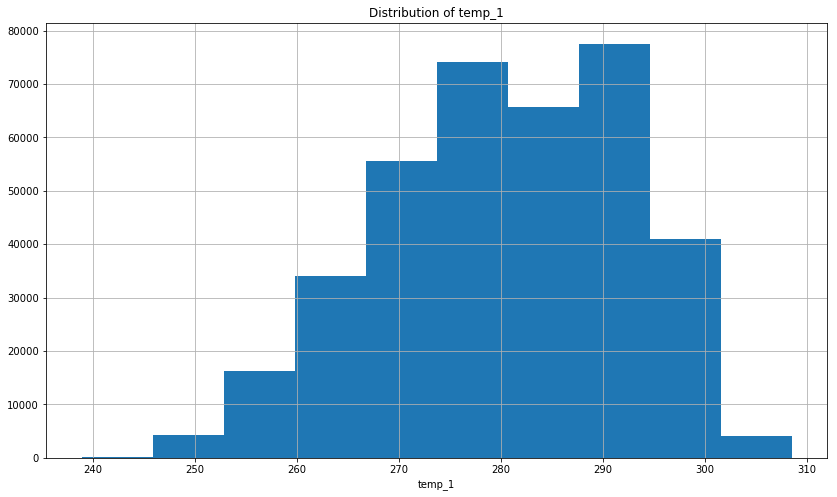

In [19]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df_lr.temp_1.hist()
plt.title('Distribution of temp_1')
plt.xlabel('temp_1')
plt.show()

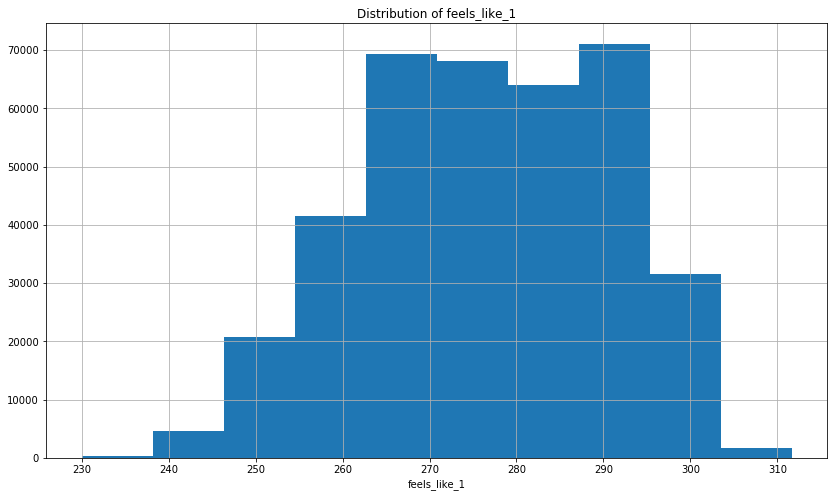

In [20]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df_lr.feels_like_1.hist()
plt.title('Distribution of feels_like_1')
plt.xlabel('feels_like_1')
plt.show()

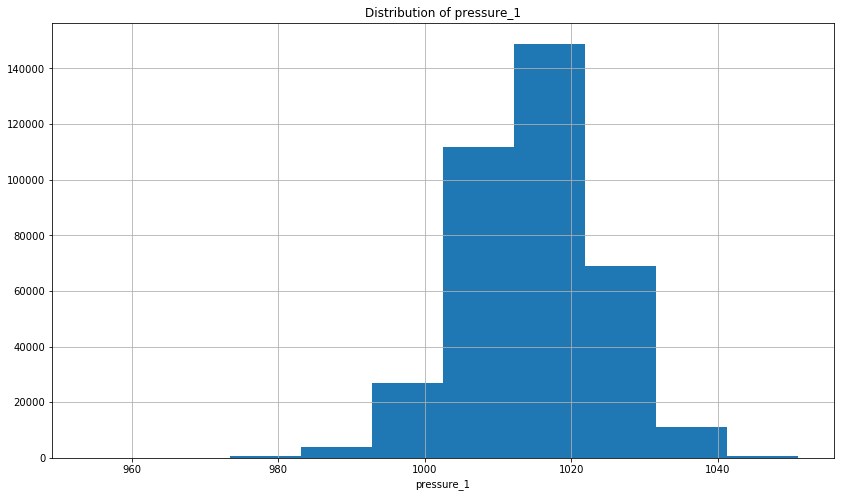

In [21]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df_lr.pressure_1.hist()
plt.title('Distribution of pressure_1')
plt.xlabel('pressure_1')
plt.show()

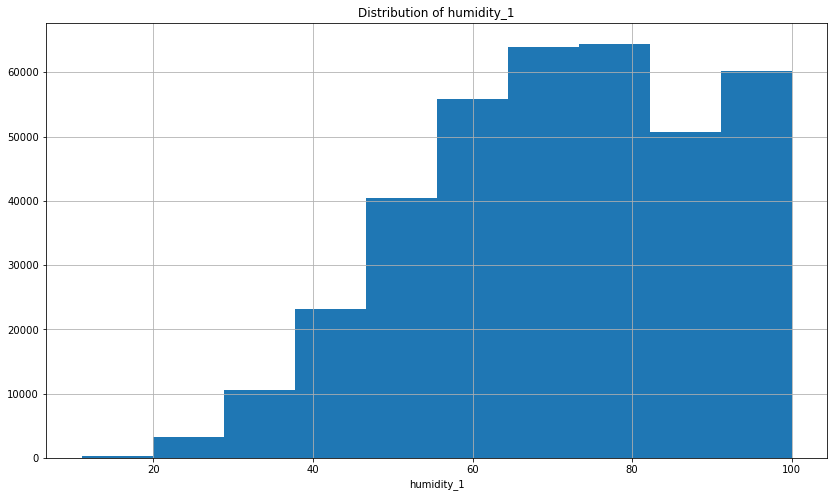

In [22]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df_lr.humidity_1.hist()
plt.title('Distribution of humidity_1')
plt.xlabel('humidity_1')
plt.show()

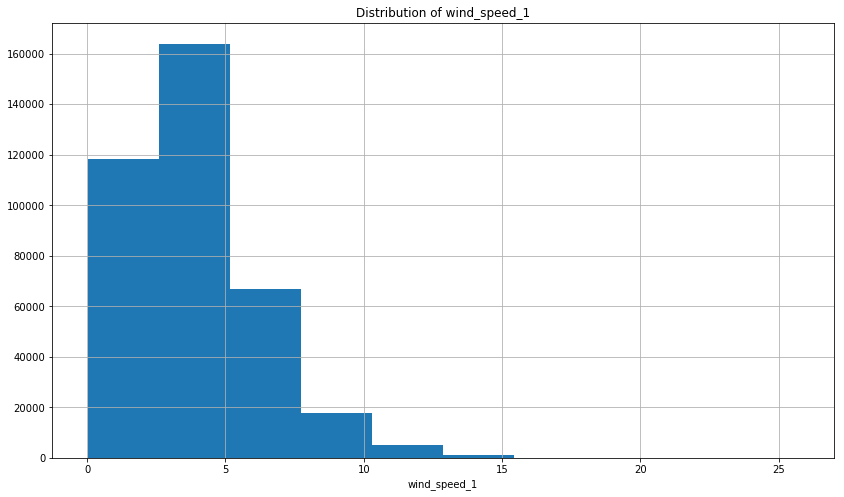

In [23]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df_lr.wind_speed_1.hist()
plt.title('Distribution of wind_speed_1')
plt.xlabel('wind_speed_1')
plt.show()

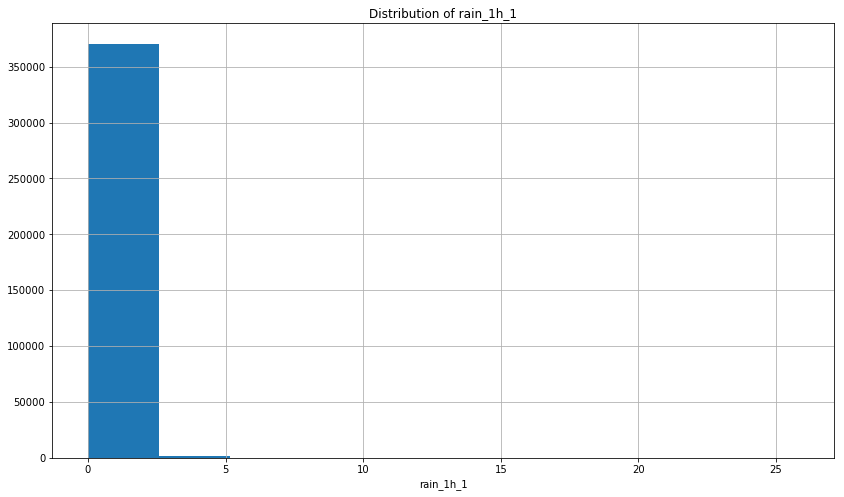

In [24]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df_lr.rain_1h_1.hist()
plt.title('Distribution of rain_1h_1')
plt.xlabel('rain_1h_1')
plt.show()

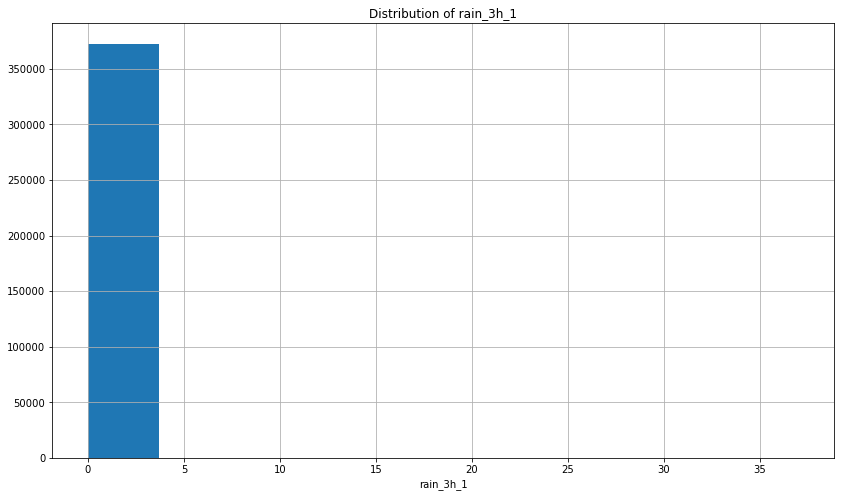

In [25]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df_lr.rain_3h_1.hist()
plt.title('Distribution of rain_3h_1')
plt.xlabel('rain_3h_1')
plt.show()

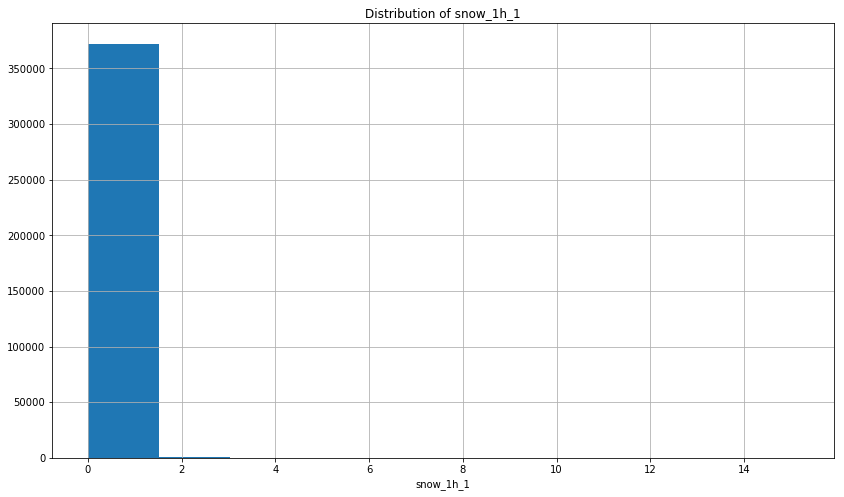

In [26]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df_lr.snow_1h_1.hist()
plt.title('Distribution of snow_1h_1')
plt.xlabel('snow_1h_1')
plt.show()

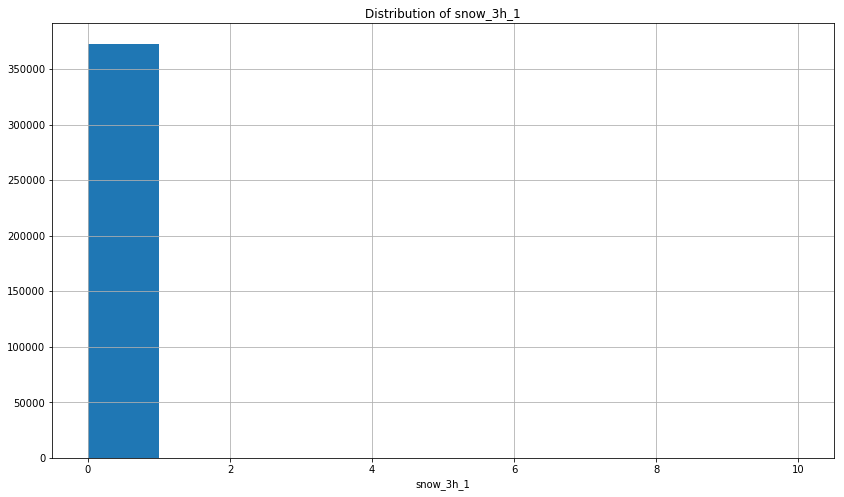

In [27]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df_lr.snow_3h_1.hist()
plt.title('Distribution of snow_3h_1')
plt.xlabel('snow_3h_1')
plt.show()

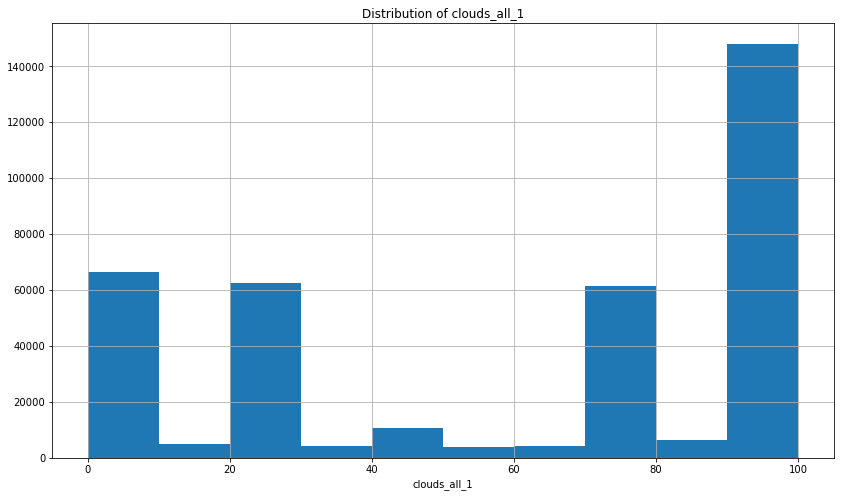

In [28]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df_lr.clouds_all_1.hist()
plt.title('Distribution of clouds_all_1')
plt.xlabel('clouds_all_1')
plt.show()

We now check the correllations between the features. We only consider the features of 1 day prior, since features containing the same datas will certainly be correlated. 

In [29]:
df_lr_corr = df_lr[['temp_1', 'feels_like_1', 'pressure_1', 'humidity_1', 'wind_speed_1', 'rain_1h_1', 'rain_3h_1', 
                   'snow_1h_1', 'snow_3h_1','clouds_all_1']].copy()
df_lr_corr = df_lr_corr.corr().abs().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
df_lr_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0:'Correlation Coefficient'}, inplace=True)
df_lr_corr.drop(df_lr_corr.iloc[1::2].index,inplace=True)
#Remove perfect correlation
df_lr_corr_nd = df_lr_corr.drop(df_lr_corr[(df_lr_corr['Correlation Coefficient']== 1.0)].index)
# Show high correlations
df_lr_corr_nd[(df_lr_corr_nd['Correlation Coefficient']>0.1)]

,Feature 1,Feature 2,Correlation Coefficient
10,temp_1,feels_like_1,0.989700
12,humidity_1,clouds_all_1,0.341322
14,clouds_all_1,pressure_1,0.319935
16,wind_speed_1,pressure_1,0.265892
18,humidity_1,pressure_1,0.251441
20,temp_1,pressure_1,0.246387
22,pressure_1,feels_like_1,0.218510
24,rain_1h_1,humidity_1,0.218324
26,feels_like_1,wind_speed_1,0.182499
28,rain_1h_1,clouds_all_1,0.179406


Unsurprinsingly, we see a high correlation between 'temp' and 'feels_like'. We thus remove 'feel_like', as it is not providing new information in our prediction model. 'Humidity' and 'clouds_all', as well as 'pressure' and 'clouds_all' are also fairly corrolated, with above 0.3 correlation coefficient. 

We make a correlation heat map. 

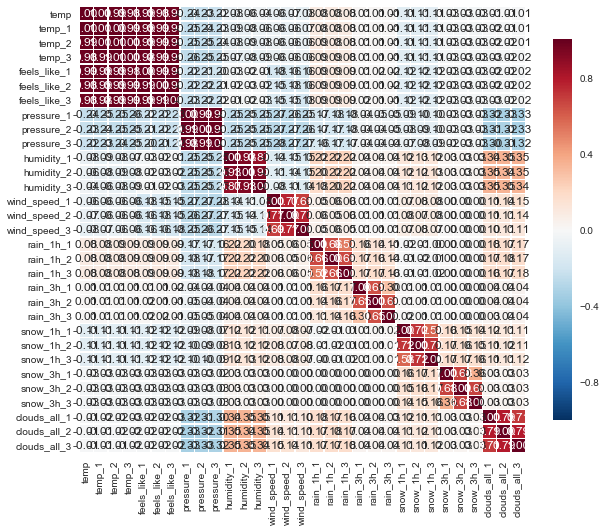

In [30]:
import seaborn as sns

def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df_lr)

In [31]:
df_lr = df_lr.drop(columns = ['feels_like_1', 'feels_like_2', 'feels_like_3'])

We now look at the correlation between the different features and 'temp', the feature we want to predict. 

In [32]:
df_lr_corr_temp = df_lr.corr().abs()[['temp']].sort_values('temp')
df_lr_corr_temp.head(35)

,temp
clouds_all_2,0.011659
clouds_all_3,0.011993
clouds_all_1,0.012899
rain_3h_1,0.013866
rain_3h_2,0.013921
rain_3h_3,0.013938
snow_3h_3,0.026247
snow_3h_2,0.026724
snow_3h_1,0.027150
humidity_3,0.042018


In our model, we only keep the features with the highest correlation, that is 'pressure' and 'temp'. From these datas we can see that most features are not linearly corrolated with temperature. 

In [33]:
df_lr = df_lr[['pressure_1', 'pressure_2',
              'pressure_3', 'temp_1', 'temp_2', 'temp_3', 'temp']]
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373022 entries, 1979-01-01 03:00:00 to 2020-07-31 23:00:00
Data columns (total 7 columns):
pressure_1    373022 non-null float64
pressure_2    373022 non-null float64
pressure_3    373022 non-null float64
temp_1        373022 non-null float64
temp_2        373022 non-null float64
temp_3        373022 non-null float64
temp          373022 non-null float64
dtypes: float64(7)
memory usage: 22.8 MB


We plot the different correlations into a scatter plot. 

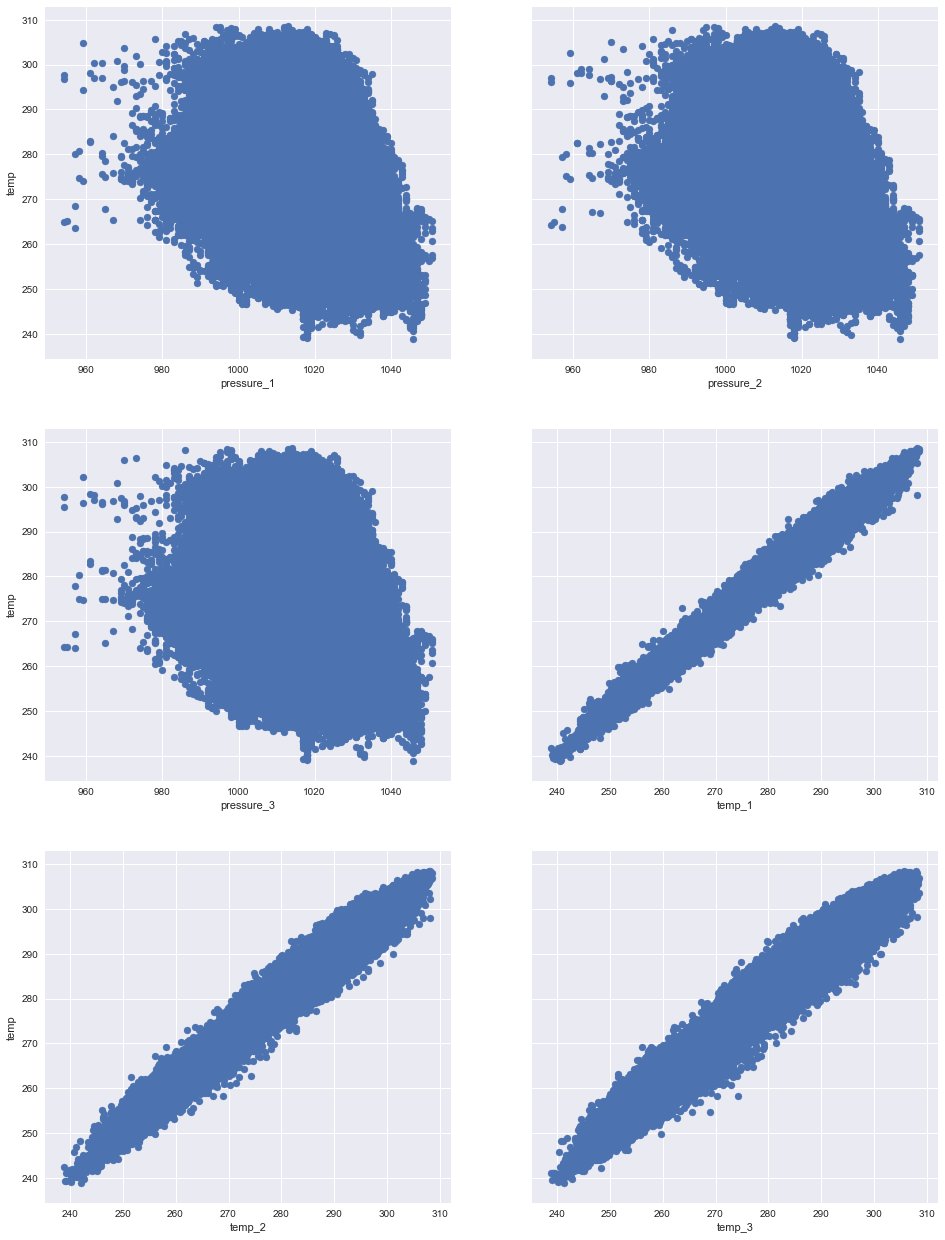

In [34]:
%matplotlib inline
features = ['pressure_1', 'pressure_2',
              'pressure_3', 'temp_1', 'temp_2', 'temp_3']

plt.rcParams['figure.figsize'] = [16, 22]
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=True)
arr = np.array(features).reshape(3, 2)

for row_arr, col_arr in enumerate(arr):
    for col, feature in enumerate(col_arr):
        axes[row_arr, col].scatter(df_lr[feature], df_lr['temp'])
        if col == 0:
            axes[row_arr, col].set(xlabel=feature, ylabel='temp')
        else:
            axes[row_arr, col].set(xlabel=feature)
plt.show()

We are now ready to perform a linear regression model on our data set, which we save into a csv file. 

In [35]:
df_lr.to_csv("weather_data_lin_reg.csv", header=True, index=True)